**데이터 불러오기**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,974 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install transformers

     |████████████████████████████████| 2.8 MB 5.2 MB/s 
     |████████████████████████████████| 895 kB 37.0 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 636 kB 39.0 MB/s 
     |████████████████████████████████| 3.3 MB 34.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install konlpy 

     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 448 kB 47.8 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
pip install --user Jpype1==0.7.0

     |████████████████████████████████| 2.8 MB 5.1 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
np.random.seed(32)
%matplotlib inline

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/review2.txt'

In [ ]:
#txt파일의 헤더 제거 및 데이터만 도출
def read_data(filename):
    with open(filename, 'r', encoding = 'cp949') as f:
        df = [line.split('\t') for line in f.read().splitlines()]
        df = df[1:]
    return df

df = read_data(filename)
len(df)

100000

In [ ]:
df

[['1', '배공빠르고 굿', '5'],
 ['2', '택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고', '2'],
 ['3',
  '아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 엉성하긴 하지만 편하고 가성비 최고예요.',
  '5'],
 ['4',
  '선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전화했더니 바로주신다했지만 배송도 누락되어있었네요.. 확인안하고 바로 선물했으면 큰일날뻔했네요..이렇게 배송이 오래걸렸으면 사는거 다시 생각했을거같아요 아쉽네요..',
  '2'],
 ['5', '민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ', '5'],
 ['6',
  '비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적으로 보였는데 생각보다 진짜 별로입니다.',
  '2'],
 ['7',
  '주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화도 안되고 아무런 연락을 받을수가 없으니 답답하신 분들은 다른곳에서 사시는거 추천드립니다',
  '1'],
 ['8', '넉넉한 길이로 주문했는데도 안 맞네요 별로예요', '2'],
 ['9', '보폴이 계속 때처럼 나오다가 지금은 안나네요~', '2'],
 ['10',
  '110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신축성없는 일반실로 되어있어 빅사이즈임에도 빅사이즈같지않아요. 입고벗을때 편하게 밴딩부분이 늘어나고 입었을때도 밴딩이 잡아주어야하는데 말이죠.',
  '2'],
 ['11', '사이즈도 딱이고 귀엽고 넘 좋아요 ㅎㅎ', '5'],
 ['12', '베이지 색 구매했는데 약간 살색에 가까워요', '2'],
 ['13', '화면빨인가봐요;; 노란컬러가 돋보여요;; 저렴한맛에 그냥 씁니다', '2'],
 ['14', '별루 ㅏㅛㅇ치ㅗ티ㅓ치ㅗ탛캏타ㅗ티ㅗ티ㅗ티ㅛ티ㅛ티ㅗㅗㅗ치ㅕ치ㅕ쳐ㅣ처ㅣ치ㅓ처ㅣ펴ㅣ쳐ㅣ치ㅕㅐㅛㅌ쵸ㅔ려ㅔㅎ', 

**데이터 전처리**


In [ ]:
df1 = pd.DataFrame(df, columns = ['id', 'review', 'rating'])

df1.head()

,id,review,rating
0,1,배공빠르고 굿,5
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,2
2,3,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,5
3,4,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,2
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,5


In [ ]:
#긍정을 1 부정을 0으로 변환 
def change(x):
    if int(x) < 3: 
      return 0
    else: 
      return 1
      
df1['rating'] = df1['rating'].apply(change)

In [ ]:
df1.head()

,id,review,rating
0,1,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,3,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,4,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [ ]:
#긍정과 부정 비율 확인
df1['rating'].value_counts()

0    50347
1    49653
Name: rating, dtype: int64

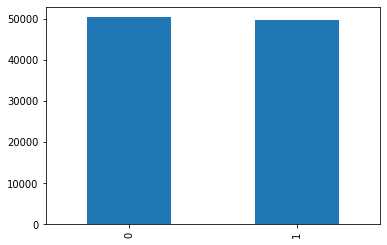

In [ ]:
df1['rating'].value_counts().plot(kind = 'bar')

In [ ]:
print(df1.isnull().values.any())

False


In [ ]:
data = df1.values.tolist()

In [ ]:
data

[['1', '배공빠르고 굿', 1],
 ['2', '택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고', 0],
 ['3',
  '아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 엉성하긴 하지만 편하고 가성비 최고예요.',
  1],
 ['4',
  '선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전화했더니 바로주신다했지만 배송도 누락되어있었네요.. 확인안하고 바로 선물했으면 큰일날뻔했네요..이렇게 배송이 오래걸렸으면 사는거 다시 생각했을거같아요 아쉽네요..',
  0],
 ['5', '민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ', 1],
 ['6',
  '비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적으로 보였는데 생각보다 진짜 별로입니다.',
  0],
 ['7',
  '주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화도 안되고 아무런 연락을 받을수가 없으니 답답하신 분들은 다른곳에서 사시는거 추천드립니다',
  0],
 ['8', '넉넉한 길이로 주문했는데도 안 맞네요 별로예요', 0],
 ['9', '보폴이 계속 때처럼 나오다가 지금은 안나네요~', 0],
 ['10',
  '110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신축성없는 일반실로 되어있어 빅사이즈임에도 빅사이즈같지않아요. 입고벗을때 편하게 밴딩부분이 늘어나고 입었을때도 밴딩이 잡아주어야하는데 말이죠.',
  0],
 ['11', '사이즈도 딱이고 귀엽고 넘 좋아요 ㅎㅎ', 1],
 ['12', '베이지 색 구매했는데 약간 살색에 가까워요', 0],
 ['13', '화면빨인가봐요;; 노란컬러가 돋보여요;; 저렴한맛에 그냥 씁니다', 0],
 ['14', '별루 ㅏㅛㅇ치ㅗ티ㅓ치ㅗ탛캏타ㅗ티ㅗ티ㅗ티ㅛ티ㅛ티ㅗㅗㅗ치ㅕ치ㅕ쳐ㅣ처ㅣ치ㅓ처ㅣ펴ㅣ쳐ㅣ치ㅕㅐㅛㅌ쵸ㅔ려ㅔㅎ', 0],
 ['15', '촉감도 좋고 무게감이나 

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(data, test_size=0.2, shuffle=True, random_state=34)

In [ ]:
print(len(train_data))
print(len(train_data[0]))
print(len(test_data))
print(len(test_data[0]))

80000
3
20000
3


In [ ]:
train_data[:5]

[['48473', '케이스사려구 일부러 쪽쪽이 더사면서까지 했는데 이거 넘 잘빠져버리구 넘 허술해', 0],
 ['5938',
  '작은 서랍장 떨어져서 붙이려고 샀는데 제가 제대로 사용을 못해서 그런지 몰라도 핀이 나무에 안박힙니다 종이 몇 장만 박히고요 ㅠㅠ 잘못산듯합니다',
  0],
 ['7468', '두번째 구매 효과는 잘몰겠고 조ㅓ아지겠지 하는 심정으로 먹여요', 1],
 ['2396',
  '제가 원하던 사이즈에 보들보들한 촉감도 우리 아이에게 딱이에요! 피부가 예민한 편인데 안심하고 쓸수 있을거 같고 접어서 어린이집 보내니 세상 편하네요',
  1],
 ['68515', '조립하기 힘들어요 불안해서 벽고정 했습니다', 0]]

In [ ]:
test_data[:5]

[['63244', '삼다수가필요해서 주문 택배메세지 사진과 친절하게안내해줌', 1],
 ['44437', '맛은 별루예요 사용할일이 거의 앖네요 ㅋ', 0],
 ['58811', '젤형태라 바로 흡수돼서 화장할때 발라도 좋아요...멍 빨리 빠졌으면 좋겠어요', 1],
 ['23924', '고밀도 폼이라 단열이 잘됩니다.', 1],
 ['34765', '재구매 자극도 없고 제형도 적당해서 좋아요', 1]]

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
#konlpy를 이용한 데이터 정제
import json
import os
from pprint import pprint

def tokenize(doc):
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

if os.path.isfile('/content/train_docs.json'):
    with open('/content/train_docs.json') as f:
        train_docs = json.load(f)
    with open('/content/test_docs.json') as f:
        test_docs = json.load(f)
else:
    train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
    test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
    with open('/content/train_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open('/content/test_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")

pprint(train_docs[0])

(['케이스/Noun',
  '사다/Verb',
  '일부러/Noun',
  '쪽쪽이/Noun',
  '더/Noun',
  '사다/Verb',
  '하다/Verb',
  '이/Determiner',
  '거/Noun',
  '넘다/Verb',
  '잘빠지다/Verb',
  '버리다/Verb',
  '넘다/Verb',
  '허다/Verb',
  '술해/Noun'],
 0)


In [ ]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

1240804


In [ ]:
import nltk
text = nltk.Text(tokens, name='NMSC')
print(text)

<Text: NMSC>


In [ ]:
import nltk
text = nltk.Text(tokens, name='NMSC')

print(len(text.tokens))
print(len(set(text.tokens)))
print(text.vocab().most_common(10))

1240804
29943
[('하다/Verb', 38850), ('./Punctuation', 30834), ('이/Josa', 27211), ('좋다/Adjective', 24301), ('도/Josa', 19774), ('에/Josa', 19019), ('가/Josa', 18628), ('너무/Adverb', 11775), ('배송/Noun', 11482), ('은/Josa', 10123)]


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51339 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

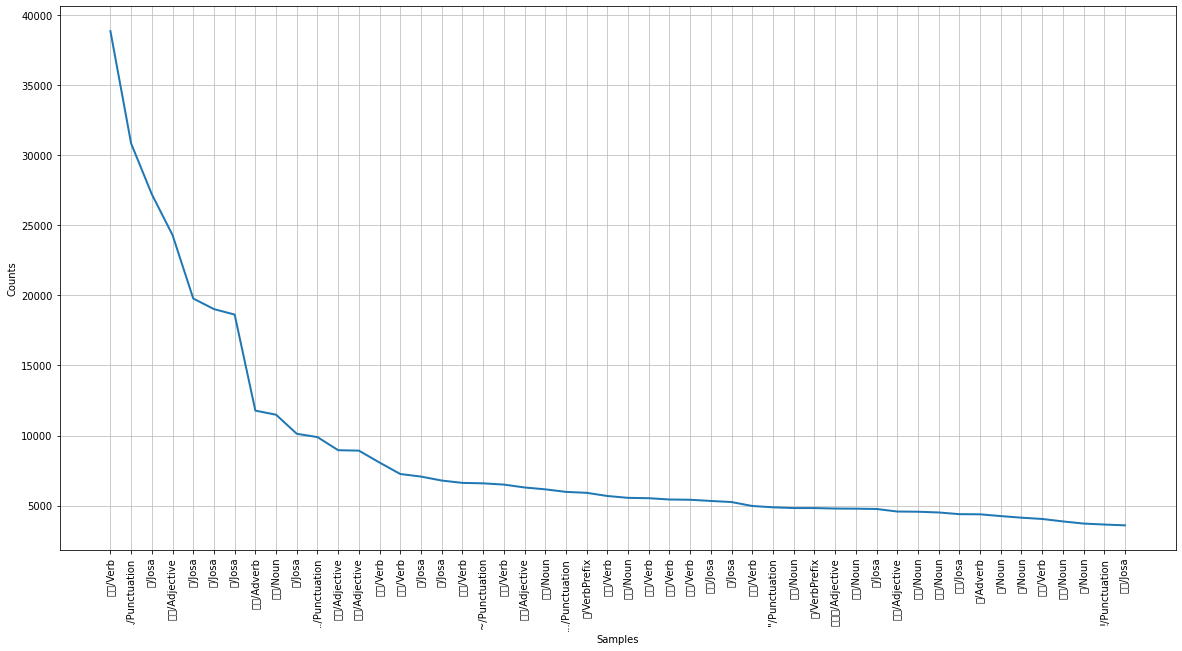

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(20,10))
text.plot(50);

In [ ]:
frequency = 1000;

In [ ]:
selected_words = [f[0] for f in text.vocab().most_common(frequency)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d, _ in train_docs]
test_x = [term_frequency(d) for d, _ in test_docs]

train_y = [c for _, c in train_docs]
test_y = [c for _, c in test_docs]

In [ ]:
x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [ ]:
x_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train

array([0., 0., 1., ..., 1., 1., 0.], dtype=float32)

In [ ]:
from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.layers import Embedding, Dense, LSTM

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])
model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
157/157 [==============================] - 4s 5ms/step - loss: 0.3460 - binary_accuracy: 0.8714
Epoch 2/10
157/157 [==============================] - 1s 5ms/step - loss: 0.2729 - binary_accuracy: 0.8963
Epoch 3/10
157/157 [==============================] - 2s 12ms/step - loss: 0.2596 - binary_accuracy: 0.9003
Epoch 4/10
157/157 [==============================] - 1s 5ms/step - loss: 0.2496 - binary_accuracy: 0.9047
Epoch 5/10
157/157 [==============================] - 1s 5ms/step - loss: 0.2403 - binary_accuracy: 0.9080
Epoch 6/10
157/157 [==============================] - 1s 5ms/step - loss: 0.2314 - binary_accuracy: 0.9128
Epoch 7/10
157/157 [==============================] - 1s 5ms/step - loss: 0.2226 - binary_accuracy: 0.9167
Epoch 8/10
157/157 [==============================] - 1s 5ms/step - loss: 0.2131 - binary_accuracy: 0.9208
Epoch 9/10
157/157 [==============================] - 1s 5ms/step - loss: 0.2043 - binary_accuracy: 0.9247
Epoch 10/10
625/625 [===============

In [ ]:
results

[0.284572571516037, 0.8956999778747559]

In [ ]:
def predict(review):
    token = tokenize(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
        print("[{}]는 {:.2f}% 긍정".format(review, score * 100))
    else:
        print("[{}]는 {:.2f}% 부정".format(review, (1 - score) * 100))

In [ ]:
#Chance Level 확인
predict("이거 써봤는데 좋아요")

[이거 써봤는데 좋아요]는 84.07% 긍정


In [ ]:
predict("아 진짜 별로네")

[아 진짜 별로네]는 97.61% 부정


In [ ]:
predict("진짜 이거 산게 어이가 없네요 다시는 안살래요")

[진짜 이거 산게 어이가 없네요 다시는 안살래요]는 99.97% 부정


In [ ]:
predict("진짜 좋아요 다시 사고 싶어요")

[진짜 좋아요 다시 사고 싶어요]는 86.19% 긍정
